In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
sns.set_style('whitegrid')

In [2]:
fp = r'india-polygon.shp'
map_df = gpd.read_file(fp) 
map_df_copy = gpd.read_file(fp)
map_df.head()

id                        st_nm   
0 NaN  Andaman and Nicobar Islands  \
1 NaN            Arunachal Pradesh   
2 NaN                        Assam   
3 NaN                        Bihar   
4 NaN                   Chandigarh   

                                            geometry  
0  MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...  
1  POLYGON ((95.23643 26.68105, 95.19594 27.03612...  
2  POLYGON ((95.19594 27.03612, 95.08795 26.94578...  
3  POLYGON ((88.11357 26.54028, 88.28006 26.37640...  
4  POLYGON ((76.84208 30.76124, 76.83758 30.72552...

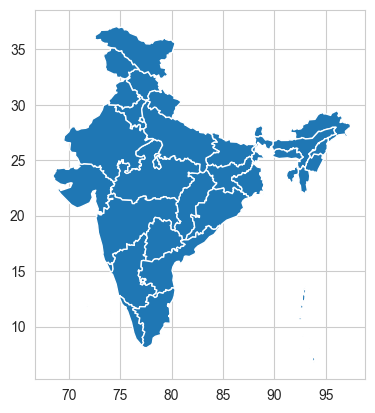

In [3]:
map_df.plot()
plt.savefig('mapbor.png')

In [4]:
df = pd.read_csv('crimeplot.csv')
df_copy = pd.read_csv('crimeplot.csv')  # making a copy of dataframe

In [5]:
pd.set_option('display.max_columns', None)



In [6]:
df.head()

STATE   Count
0  Andaman and Nicobar Islands    1332
1               Andhra Pradesh  222199
2            Arunachal Pradesh    3039
3                        Assam  133239
4                        Bihar  282083

In [7]:
df

STATE   Count
0   Andaman and Nicobar Islands    1332
1                Andhra Pradesh  222199
2             Arunachal Pradesh    3039
3                         Assam  133239
4                         Bihar  282083
5                    Chandigarh    2995
6                  Chhattisgarh  110633
7        Dadra and Nagar Haveli     579
8                 Daman and Diu     579
9                         Delhi  306389
10                          Goa    2991
11                      Gujarat  731738
12                      Haryana  206431
13             Himachal Pradesh   18833
14            Jammu and Kashmir   31675
15                    Jharkhand   60765
16                    Karnataka  163697
17                       Kerala  524960
18                  Lakshadweep     128
19               Madhya Pradesh  475918
20                  Maharashtra  540800
21                      Manipur    3204
22                    Meghalaya    3428
23                      Mizoram    3196
24                     Nagaland    1478
25                       Orissa  155420
26                  Pondicherry    4595
27                       Punjab   73581
28                    Rajasthan  284569
29                       Sikkim     728
30                   Tamil Nadu  756753
31                   Telangana   158809
32                      Tripura    4788
33                Uttar Pradesh  608082
34                  Uttarakhand   34875
35                  West Bengal  181821

In [8]:
State_df=df

In [9]:
fp = r'india-polygon.shp'
map_df = gpd.read_file(fp)                          # Reads the shape file of India for plotting purpose
map_df_copy = gpd.read_file(fp)
map_df.head()

id                        st_nm   
0 NaN  Andaman and Nicobar Islands  \
1 NaN            Arunachal Pradesh   
2 NaN                        Assam   
3 NaN                        Bihar   
4 NaN                   Chandigarh   

                                            geometry  
0  MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...  
1  POLYGON ((95.23643 26.68105, 95.19594 27.03612...  
2  POLYGON ((95.19594 27.03612, 95.08795 26.94578...  
3  POLYGON ((88.11357 26.54028, 88.28006 26.37640...  
4  POLYGON ((76.84208 30.76124, 76.83758 30.72552...

In [10]:

cr_df = df[df.Count=="Count"]



In [11]:
cnt_df = cr_df["Count"].value_counts()   # This gives the number of landslides that took place in every state over the years



In [12]:
State_df


STATE   Count
0   Andaman and Nicobar Islands    1332
1                Andhra Pradesh  222199
2             Arunachal Pradesh    3039
3                         Assam  133239
4                         Bihar  282083
5                    Chandigarh    2995
6                  Chhattisgarh  110633
7        Dadra and Nagar Haveli     579
8                 Daman and Diu     579
9                         Delhi  306389
10                          Goa    2991
11                      Gujarat  731738
12                      Haryana  206431
13             Himachal Pradesh   18833
14            Jammu and Kashmir   31675
15                    Jharkhand   60765
16                    Karnataka  163697
17                       Kerala  524960
18                  Lakshadweep     128
19               Madhya Pradesh  475918
20                  Maharashtra  540800
21                      Manipur    3204
22                    Meghalaya    3428
23                      Mizoram    3196
24                     Nagaland    1478
25                       Orissa  155420
26                  Pondicherry    4595
27                       Punjab   73581
28                    Rajasthan  284569
29                       Sikkim     728
30                   Tamil Nadu  756753
31                   Telangana   158809
32                      Tripura    4788
33                Uttar Pradesh  608082
34                  Uttarakhand   34875
35                  West Bengal  181821

In [13]:
fp = r'india-polygon.shp'
map_df = gpd.read_file(fp)                          # Reads the shape file of India for plotting purpose
map_df_copy = gpd.read_file(fp)
map_df.head()

id                        st_nm   
0 NaN  Andaman and Nicobar Islands  \
1 NaN            Arunachal Pradesh   
2 NaN                        Assam   
3 NaN                        Bihar   
4 NaN                   Chandigarh   

                                            geometry  
0  MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...  
1  POLYGON ((95.23643 26.68105, 95.19594 27.03612...  
2  POLYGON ((95.19594 27.03612, 95.08795 26.94578...  
3  POLYGON ((88.11357 26.54028, 88.28006 26.37640...  
4  POLYGON ((76.84208 30.76124, 76.83758 30.72552...

In [14]:
#Merging the data
merged = map_df.set_index('st_nm').join(State_df.set_index('STATE'))
merged['Count'] = merged['Count'].replace(np.nan, 0)
merged.head()

id   
st_nm                             
Andaman and Nicobar Islands NaN  \
Arunachal Pradesh           NaN   
Assam                       NaN   
Bihar                       NaN   
Chandigarh                  NaN   

                                                                      geometry   
st_nm                                                                            
Andaman and Nicobar Islands  MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...  \
Arunachal Pradesh            POLYGON ((95.23643 26.68105, 95.19594 27.03612...   
Assam                        POLYGON ((95.19594 27.03612, 95.08795 26.94578...   
Bihar                        POLYGON ((88.11357 26.54028, 88.28006 26.37640...   
Chandigarh                   POLYGON ((76.84208 30.76124, 76.83758 30.72552...   

                                Count  
st_nm                                  
Andaman and Nicobar Islands    1332.0  
Arunachal Pradesh              3039.0  
Assam                        133239.0  
Bihar                        282083.0  
Chandigarh                     2995.0

In [15]:
merged

id   
st_nm                             
Andaman and Nicobar Islands NaN  \
Arunachal Pradesh           NaN   
Assam                       NaN   
Bihar                       NaN   
Chandigarh                  NaN   
Chhattisgarh                NaN   
Dadra and Nagar Haveli      NaN   
Daman and Diu               NaN   
Goa                         NaN   
Gujarat                     NaN   
Haryana                     NaN   
Himachal Pradesh            NaN   
Jharkhand                   NaN   
Karnataka                   NaN   
Kerala                      NaN   
Lakshadweep                 NaN   
Madhya Pradesh              NaN   
Maharashtra                 NaN   
Manipur                     NaN   
Meghalaya                   NaN   
Mizoram                     NaN   
Nagaland                    NaN   
Delhi                       NaN   
Puducherry                  NaN   
Punjab                      NaN   
Rajasthan                   NaN   
Sikkim                      NaN   
Tamil Nadu                  NaN   
Telangana                   NaN   
Tripura                     NaN   
Uttar Pradesh               NaN   
Uttarakhand                 NaN   
West Bengal                 NaN   
Odisha                      NaN   
Andhra Pradesh              NaN   
Jammu and Kashmir           NaN   
Ladakh                      NaN   

                                                                      geometry   
st_nm                                                                            
Andaman and Nicobar Islands  MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...  \
Arunachal Pradesh            POLYGON ((95.23643 26.68105, 95.19594 27.03612...   
Assam                        POLYGON ((95.19594 27.03612, 95.08795 26.94578...   
Bihar                        POLYGON ((88.11357 26.54028, 88.28006 26.37640...   
Chandigarh                   POLYGON ((76.84208 30.76124, 76.83758 30.72552...   
Chhattisgarh                 POLYGON ((83.94694 23.62196, 83.95594 23.62406...   
Dadra and Nagar Haveli       POLYGON ((73.20640 20.12165, 73.20865 20.10695...   
Daman and Diu                POLYGON ((72.80144 20.37378, 72.84418 20.47463...   
Goa                          POLYGON ((74.11982 15.65278, 74.24806 15.65698...   
Gujarat                      MULTIPOLYGON (((68.35808 23.80475, 68.41658 23...   
Haryana                      POLYGON ((77.12555 30.56374, 77.21329 30.50281...   
Himachal Pradesh             POLYGON ((78.92089 31.25498, 79.01313 31.11211...   
Jharkhand                    POLYGON ((87.79410 25.22084, 87.77835 25.10108...   
Karnataka                    POLYGON ((77.55301 18.29376, 77.65650 17.97231...   
Kerala                       POLYGON ((76.43261 11.66713, 76.23238 11.57049...   
Lakshadweep                  MULTIPOLYGON (((74.10182 11.20491, 73.96458 11...   
Madhya Pradesh               POLYGON ((82.81529 23.96232, 82.55207 23.79214...   
Maharashtra                  POLYGON ((80.66449 21.33184, 80.64649 21.25411...   
Manipur                      POLYGON ((94.68073 25.45405, 94.59974 25.18932...   
Meghalaya                    POLYGON ((92.43993 25.03175, 92.07772 25.18512...   
Mizoram                      POLYGON ((93.00013 24.39934, 92.98439 24.12620...   
Nagaland                     POLYGON ((95.23643 26.68105, 95.06770 26.46044...   
Delhi                        POLYGON ((77.19755 28.86191, 77.33703 28.67912...   
Puducherry                   MULTIPOLYGON (((79.79156 10.99271, 79.79156 10...   
Punjab                       POLYGON ((76.73859 30.93982, 76.73859 30.93562...   
Rajasthan                    POLYGON ((74.28855 29.95655, 74.29980 29.95655...   
Sikkim                       POLYGON ((88.75926 27.14748, 88.59728 27.19370...   
Tamil Nadu                   MULTIPOLYGON (((79.78256 11.89825, 79.79156 11...   
Telangana                    POLYGON ((81.05595 17.79162, 81.05820 17.75380...   
Tripura                      POLYGON ((92.23295 24.50229, 92.27345 24.38673...   
Uttar Pradesh                POLYGON ((

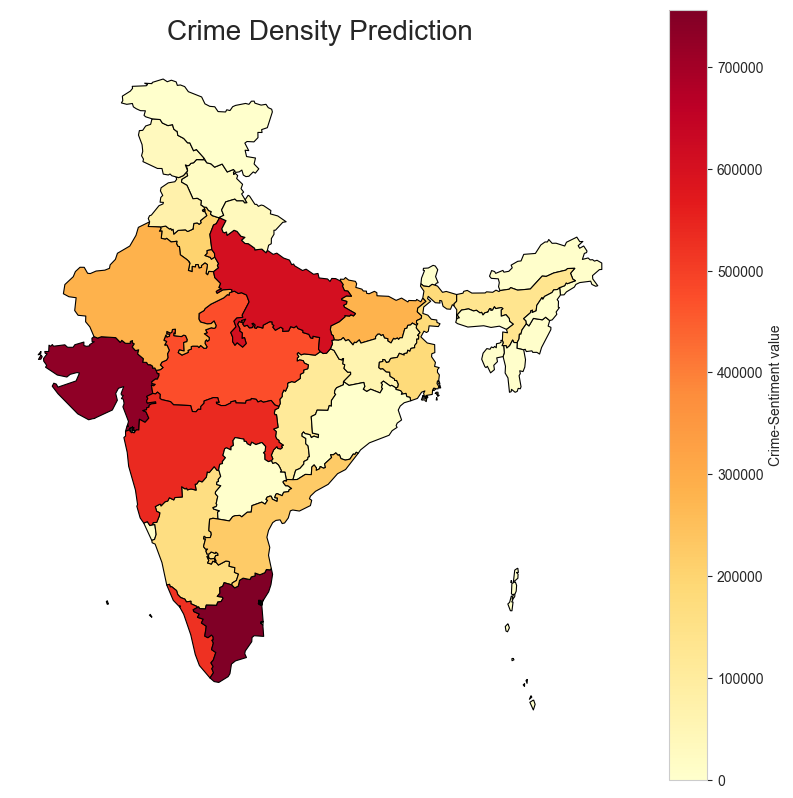

In [16]:
#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Crime Density Prediction', fontdict={'fontsize': '20', 'fontweight' : '10'})

# Plot the figure
merged.plot(column='Count',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', \
            legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Crime-Sentiment value"})

plt.savefig('plott.png')

In [1]:
from tkinter import *

root = Tk()

def openNewWindow():
    newWindow = Toplevel(root)
    newWindow.title("Display Plot")
    img = PhotoImage(file='plott.png')
    l = Label(newWindow, image=img, height=900, width=900).pack()
    newWindow.mainloop()




frame = Frame(root, padx=100, pady=100)
frame1 = Frame(frame, padx=50, pady=50)
frame1.pack()
frame2 = Frame(frame, padx=50, pady=50)
frame2.pack()
frame.pack()
button1 = Button(frame1, text = 'Display', fg ='red', command=openNewWindow)
button1.pack()
label = Label(frame2, text='Enter File for Sentiment Analysis').pack()
clicked = StringVar()
clicked.set( "Use existing file" )

options = [
    "Use existing file",
    "Upload file" 
]
menu = OptionMenu(frame2, clicked, *options)

menu.pack()
root.mainloop()
